<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
from sklearn.datasets.samples_generator import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D

Generate Data

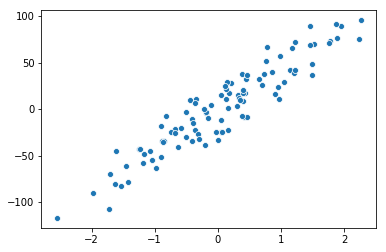

In [2]:
m = 100
n = 2
x1, x2 = make_regression(n_samples=m, n_features=n-1, noise=15.0, random_state=0)
x1 = x1.flatten()
sns.scatterplot(x1, x2)

Check approximate gaussian distribution

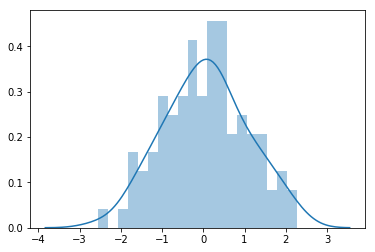

In [3]:
sns.distplot(x1, bins=20)

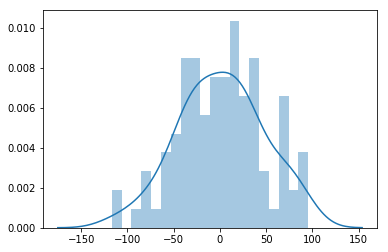

In [4]:
sns.distplot(x2, bins=20)

Calculate mean (mu), covariance matrix (sigma), and inverse of sigma

In [0]:
X = np.concatenate((x1.reshape((-1, 1)), x2.reshape((-1, 1))), axis=1)

mu = np.mean(X, axis=0)
sigma = (1/m)*np.dot(X.T, X)
sigma_inv = np.linalg.inv(sigma)

Graph p(x) distribution

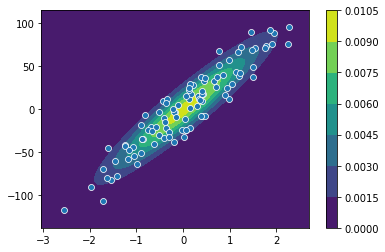

In [6]:
x_min = min(X[:, 0])
x_max = max(X[:, 0])
y_min = min(X[:, 1])
y_max = max(X[:, 1])
x_margin = (x_max-x_min)/10
y_margin = (y_max-y_min)/10
step_x = (x_max - x_min)/100
step_y = (y_max - y_min)/100
xx, yy = np.meshgrid(np.arange(x_min-x_margin, x_max+x_margin, step_x), np.arange(y_min-y_margin, y_max+y_margin, step_y))
d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

Z = (1/((2*math.pi)**(n/2) * np.linalg.det(sigma) ** (1/2))) * np.exp(-(1/2)*np.diagonal(np.dot(d-mu, np.dot(sigma_inv, (d-mu).T))))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.colorbar()
sns.scatterplot(x1, x2)
plt.show()

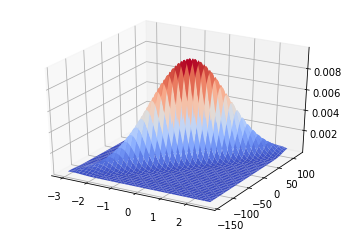

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm)
ax.view_init(elev=30)
plt.show()